# 1. Setup and Get Data

## 1.1 Install Dependencies and Setup

In [1]:
!pip install labelme tensorflow==2.10.0 tensorflow-gpu==2.10.0 opencv-python matplotlib albumentations

## 1.2 Collect Images Using OpenCV

In [1]:
import os # makes it easier to navigate tough different file paths
import time # allows to use time
import uuid # allows to create uniform unique identifier, example: for unique file names for images (more professional)
import cv2 # allows to use different senses like different camaras etc. (for computer vision), doesnt work for colab

In [151]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 10

In [152]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collection image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join('KlaraBilder', f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Collection image 0
Collection image 1
Collection image 2
Collection image 3
Collection image 4
Collection image 5
Collection image 6
Collection image 7
Collection image 8
Collection image 9


## 1.3 Annotate Images with LabelMe

This command should run the package 'labelme'. 

In the prompt select a different output folder so the labels are saved in the correct folder.
Also hit autosave so it saves automaticly.

In [89]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\FRANC\.labelmerc


# 2. Review Dataset and Build Image Loading Function

## 2.1 Import TF and Deps

In [2]:
import tensorflow as tf
import json # our labels are in json format
import numpy as np
from matplotlib import pyplot as plt

## 2.2 Limit GPU Memory Growth

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2.3 Load Image into TF Data Pipeline

In [44]:
image_names = tf.data.Dataset.list_files('Data\\images\\*.jpg', shuffle=False)

In [45]:
image_names.as_numpy_iterator().next()

b'Data\\images\\003d213c-3f5f-11ee-926d-5ce42a8c8f38.jpg'

In [46]:
for element in image_names.as_numpy_iterator():
    print(element)

b'Data\\images\\003d213c-3f5f-11ee-926d-5ce42a8c8f38.jpg'
b'Data\\images\\008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.jpg'
b'Data\\images\\00daeaf9-3f5f-11ee-a611-5ce42a8c8f38.jpg'
b'Data\\images\\012ab70e-3f5f-11ee-93b0-5ce42a8c8f38.jpg'
b'Data\\images\\01787553-3f5f-11ee-beb2-5ce42a8c8f38.jpg'
b'Data\\images\\01c6c943-3f5f-11ee-915d-5ce42a8c8f38.jpg'
b'Data\\images\\02147e2e-3f5f-11ee-a4af-5ce42a8c8f38.jpg'
b'Data\\images\\02635b40-3f5f-11ee-80a9-5ce42a8c8f38.jpg'
b'Data\\images\\02b22b02-3f5f-11ee-ac83-5ce42a8c8f38.jpg'
b'Data\\images\\03011142-3f5f-11ee-97d9-5ce42a8c8f38.jpg'
b'Data\\images\\034f723f-3f5f-11ee-81a9-5ce42a8c8f38.jpg'
b'Data\\images\\03a0c781-3f5f-11ee-8a9a-5ce42a8c8f38.jpg'
b'Data\\images\\03ef3058-3f5f-11ee-b4af-5ce42a8c8f38.jpg'
b'Data\\images\\043d7f58-3f5f-11ee-8ffc-5ce42a8c8f38.jpg'
b'Data\\images\\105e34ef-3f5f-11ee-a0c3-5ce42a8c8f38.jpg'
b'Data\\images\\10ae797a-3f5f-11ee-87af-5ce42a8c8f38.jpg'
b'Data\\images\\10fccffa-3f5f-11ee-bf3e-5ce42a8c8f38.jpg'
b'Data\\images

In [5]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [54]:
images = image_names.map(load_image) # images is a list of different arrays not one single big array (images[0] n.l)

In [56]:
images.as_numpy_iterator().next()

array([[[ 89,  90,  74],
        [ 89,  90,  74],
        [ 89,  90,  74],
        ...,
        [141, 143, 138],
        [145, 147, 142],
        [149, 151, 146]],

       [[ 86,  87,  71],
        [ 87,  88,  72],
        [ 89,  90,  74],
        ...,
        [141, 143, 138],
        [146, 148, 143],
        [150, 152, 147]],

       [[ 85,  86,  70],
        [ 87,  88,  72],
        [ 88,  89,  73],
        ...,
        [141, 146, 140],
        [144, 149, 143],
        [148, 153, 147]],

       ...,

       [[ 12,  15,   4],
        [ 14,  17,   6],
        [ 15,  18,   7],
        ...,
        [149, 151, 140],
        [150, 151, 143],
        [151, 152, 144]],

       [[ 12,  15,   4],
        [ 14,  17,   6],
        [ 14,  18,   4],
        ...,
        [148, 150, 139],
        [149, 151, 140],
        [150, 152, 141]],

       [[ 13,  16,   5],
        [ 15,  18,   7],
        [ 15,  19,   5],
        ...,
        [147, 149, 138],
        [148, 150, 139],
        [149, 151, 140]]

In [80]:
type(images) # whats the difference?

tensorflow.python.data.ops.dataset_ops.MapDataset

## 2.4 View Raw Images with Matplotlib

In [70]:
image_generator = images.batch(4).as_numpy_iterator() # put the data into batches of 4

In [78]:
plot_images = image_generator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

## 3.1 Manually split data into train test and val

Train: 71 images <br>
Test: 21 images <br>
Val: 19 images

## 3.2 Move the Matching Labels

In [5]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('Data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('Data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('Data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

# 4. Apply Image Augmentation on Images and Labels using Albumentations

In [6]:
img = cv2.imread('Data/train/images/2a66ff46-3f5f-11ee-b790-5ce42a8c8f38.jpg')

In [7]:
img.shape

(480, 640, 3)

In [5]:
import albumentations as alb

In [9]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

## 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [76]:
img = cv2.imread(os.path.join('data', 'train', 'images', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.jpg'))

In [13]:
with open(os.path.join('data', 'train', 'labels', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.json'), 'r') as f:
    label = json.load(f)

In [16]:
label['shapes'][0]['points']

[[234.52513966480444, 36.08938547486035],
 [414.41340782122904, 304.24581005586595]]

## 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [17]:
coords = [None, None, None, None]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [19]:
coords

[234.52513966480444, 36.08938547486035, 414.41340782122904, 304.24581005586595]

In [20]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [22]:
coords # Now it is in the 'albumentations' format

[0.36644553072625696,
 0.07518621973929239,
 0.6475209497206704,
 0.6338454376163873]

## 4.4 Apply Augumentations and View Results

In [89]:
img = cv2.imread(os.path.join('data', 'train', 'images', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.jpg'))

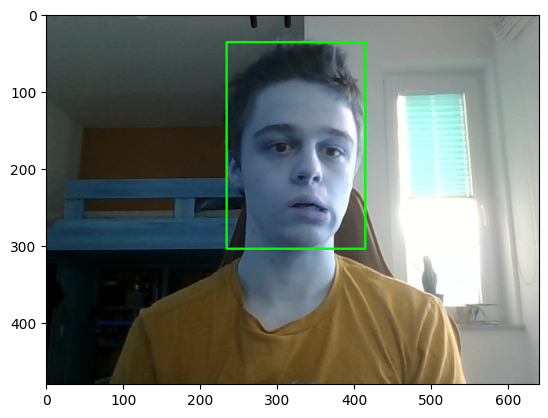

In [90]:
cv2.rectangle(img=img,
              pt1=tuple(np.multiply(coords[:2], [640, 480]).astype(int)),
              pt2=tuple(np.multiply(coords[2:], [640, 480]).astype(int)),
              color=(0, 255, 0), 
              thickness=2)

plt.imshow(img)

In [93]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [33]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [34]:
augmented['bboxes']

[(0.22797020484171326,
  0.379453755431409,
  0.6277219118559901,
  0.975356921166977)]

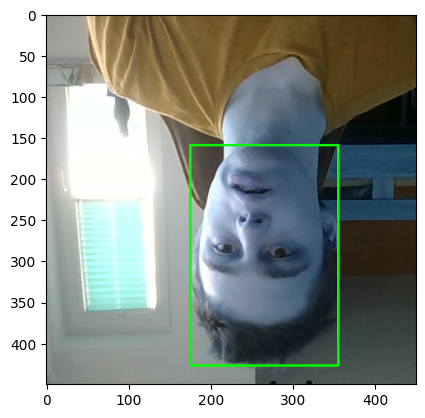

In [95]:
plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

## 5.1 Run Augumeentation Pipeline

In [98]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
x_max is less than or equal to x_min for bbox [0.655377094972067, 0.6105679702048418, 0.2905027932960893, 0.0018621973929236763, 'face'].
x_max is less than or equal to x_min for bbox [0.8657472067039105, 0.6245344506517692, 0.4903980446927374, 0.00535381750465552, 'face'].
x_max is less than or equal to x_min for bbox [0.5270600558659218, 0.7432495344506518, 0.029504189944134042, 0.0018621973929236763, 'face'].
x_max is less than or equal to x_min for bbox [0.5270600558659218, 0.7630353817504656, 0.004508767372939015, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.5331703910614525, 0.7641992551210428, 0.0, 0.0011190651951359597, 'face'].
x_max is less than or equal to x_min for bbox [0.5593575418994413, 0.6035847299813781, 0.2005935754189944, 0.0018621973929236763, 'face'].
x_max is less than or equal to x_min for bbox [0.5314245810055865, 0.7304469273743017, 0.30708798882681554, 0.37662942271880817, 'face'].
x_max is less than or equal t

In [118]:
img1 = cv2.imread(os.path.join('aug_data', 'train', 'images', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.13.jpg'))
img2 = cv2.imread(os.path.join('aug_data', 'train', 'images', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.15.jpg'))

In [119]:
with open(os.path.join('aug_data', 'train', 'labels', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.13.json'), 'r') as f:
    label1 = json.load(f)
with open(os.path.join('aug_data', 'train', 'labels', '008baf2e-3f5f-11ee-8e88-5ce42a8c8f38.15.json'), 'r') as f:
    label2 = json.load(f)

In [120]:
label1['bbox'][0]

0.20352576039726877

In [121]:
coords1 = [None, None, None, None]
coords1[0] = label1['bbox'][0]
coords1[1] = label1['bbox'][1]
coords1[2] = label1['bbox'][2]
coords1[3] = label1['bbox'][3]

coords2 = [None, None, None, None]
coords2[0] = label2['bbox'][0]
coords2[1] = label2['bbox'][1]
coords2[2] = label2['bbox'][2]
coords2[3] = label2['bbox'][3]

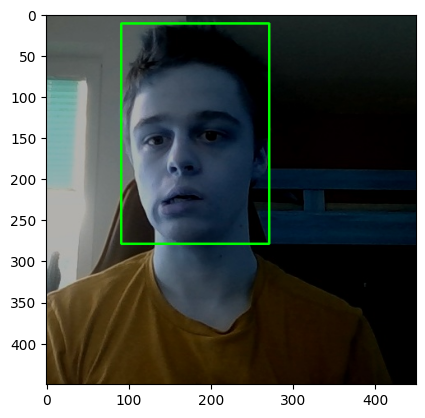

In [122]:
cv2.rectangle(img=img1,
              pt1=tuple(np.multiply(coords1[:2], [450, 450]).astype(int)),
              pt2=tuple(np.multiply(coords1[2:], [450, 450]).astype(int)),
              color=(0, 255, 0), 
              thickness=2)

plt.imshow(img1)

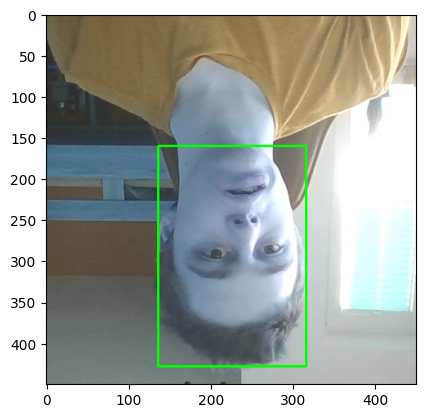

In [123]:
cv2.rectangle(img=img2,
              pt1=tuple(np.multiply(coords2[:2], [450, 450]).astype(int)),
              pt2=tuple(np.multiply(coords2[2:], [450, 450]).astype(int)),
              color=(0, 255, 0), 
              thickness=2)

plt.imshow(img2)

## 5.2 Load Augmented Images to Tensorflow Dataset

In [6]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False) # load the names of the images
train_images = train_images.map(load_image) # load the content of the files
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120))) # make it 120x120 big, more efficent, similar results less data trough model
train_images = train_images.map(lambda x: x/255) # normalize it

In [7]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False) # load the names of the images
test_images = test_images.map(load_image) # load the content of the files
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120))) # make it 120x120 big
test_images = test_images.map(lambda x: x/255) # normalize it

In [8]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False) # load the names of the images
val_images = val_images.map(load_image) # load the content of the files
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120))) # make it 120x120 big
val_images = val_images.map(lambda x: x/255) # normalize it

In [13]:
list(train_images.as_numpy_iterator())[0] # or train_images.as_numpy_iterator().next()

array([[[0.3338848 , 0.33780637, 0.28290442],
        [0.33284312, 0.3367647 , 0.28186274],
        [0.32794118, 0.33186275, 0.2769608 ],
        ...,
        [0.5503064 , 0.5699142 , 0.55422795],
        [0.5452819 , 0.5648897 , 0.54920346],
        [0.54607844, 0.5656863 , 0.55      ]],

       [[0.32941177, 0.33333334, 0.2784314 ],
        [0.32941177, 0.33333334, 0.2784314 ],
        [0.325     , 0.32892156, 0.2740196 ],
        ...,
        [0.5528799 , 0.5724878 , 0.5568015 ],
        [0.5529412 , 0.57254905, 0.5568628 ],
        [0.55784315, 0.577451  , 0.5617647 ]],

       [[0.321875  , 0.32579657, 0.27089462],
        [0.32205883, 0.3259804 , 0.27107844],
        [0.32591912, 0.3298407 , 0.27493873],
        ...,
        [0.5563725 , 0.57598037, 0.5602941 ],
        [0.5525122 , 0.5721201 , 0.5564338 ],
        [0.5504902 , 0.57009804, 0.55441177]],

       ...,

       [[0.        , 0.01617647, 0.        ],
        [0.00741422, 0.02702206, 0.00349265],
        [0.00827206, 0

# 6. Prepare Labels

## 6.1 Build Label Loading Function

In [9]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding= "utf-8") as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']

## 6.2 Load Labels to Tensorflow Dataset

In [10]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])) # x == train_labels

In [11]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [12]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.381  , 0.04242, 0.781  , 0.638  ], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Checking Pratition Lenghts

In [13]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 1080, 1080, 1080, 1080)

## 7.2 Create Final Datasets (Images/Labels)

In [14]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [15]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1200)
test = test.batch(8)
test = test.prefetch(4)

In [16]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1200)
val = val.batch(8)
val = val.prefetch(4)

In [17]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

## 7.3 View Images and Annotations

In [24]:
data_samples = train.as_numpy_iterator()

In [25]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


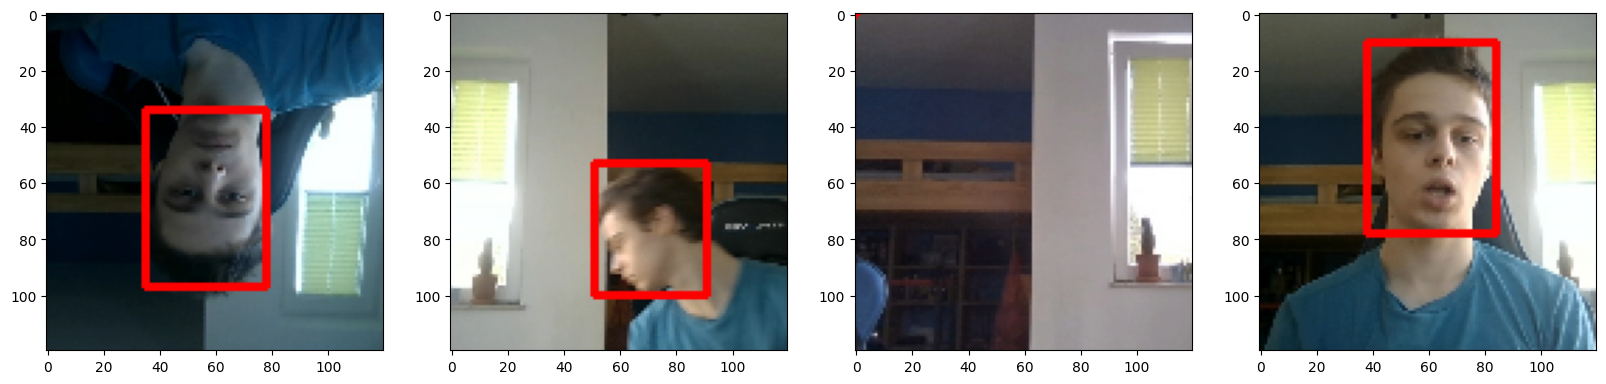

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]). astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]). astype(int)),
                  (255, 0, 0),
                  2)
    
    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Fuctional API

## 8.1 Import Layers and Base Network

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16
import graphviz
import pydot
from tensorflow.keras.utils import plot_model

## 8.2 Download VGG16

In [19]:
vgg = VGG16(include_top=False)

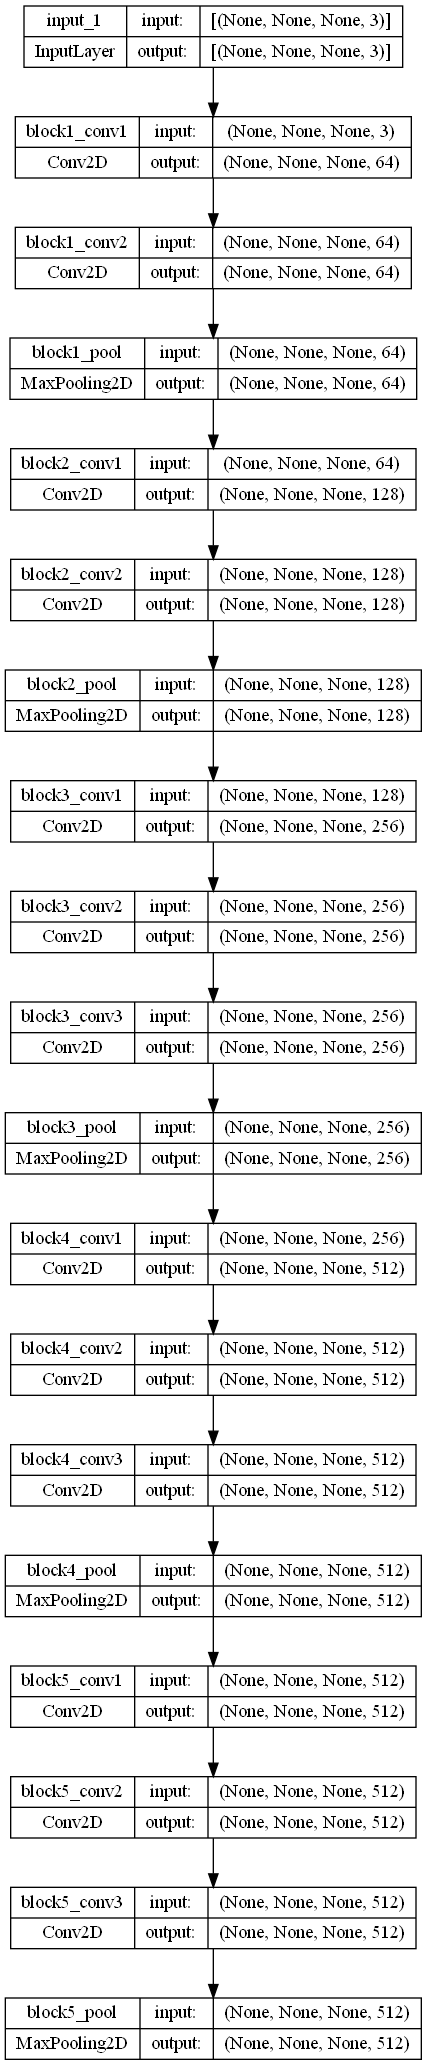

In [20]:
plot_model(vgg,  show_shapes=True)

In [21]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [22]:
def build_Model():
    input_layer = Input(shape=(120, 120, 3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [32]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.67   , 0.2732 , 1.     , 0.6953 ],
        [0.486  , 0.1958 , 0.819  , 0.6553 ],
        [0.4243 , 0.05765, 0.808  , 0.625  ],
        [0.391  , 0.418  , 0.725  , 0.809  ],
        [0.2032 , 0.2585 , 0.743  , 1.     ],
        [0.612  , 0.2869 , 0.9033 , 0.673  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.0648 , 0.     , 0.6694 , 0.8306 ]], dtype=float16))

## 8.4 Test our Neural Network

In [23]:
facetracker = build_Model()

In [24]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

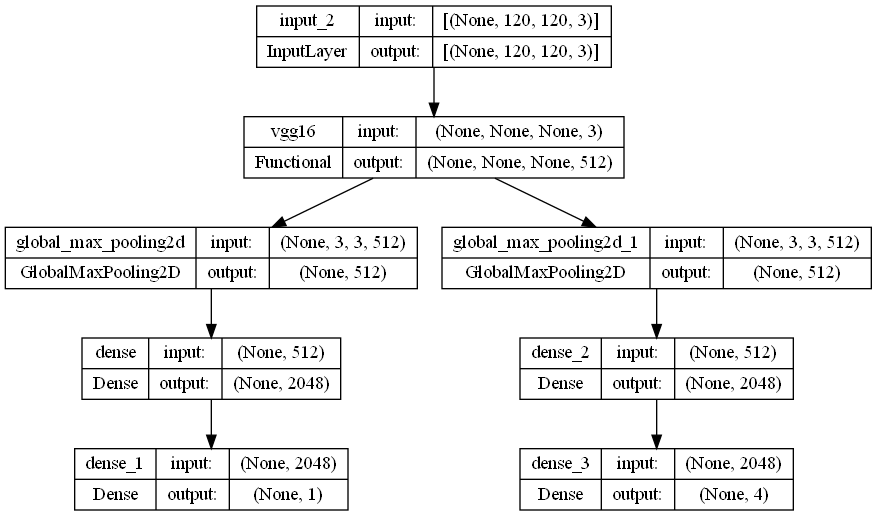

In [29]:
plot_model(facetracker, show_shapes=True)

In [25]:
X, y = train.as_numpy_iterator().next()

In [26]:
X.shape, y[0].shape, y[1].shape

((8, 120, 120, 3), (8, 1), (8, 4))

In [27]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 9s 9s/step


In [28]:
classes, coords

(array([[0.6373748 ],
        [0.5200643 ],
        [0.5675808 ],
        [0.63951695],
        [0.5969781 ],
        [0.6573576 ],
        [0.4899953 ],
        [0.6248684 ]], dtype=float32),
 array([[0.4653524 , 0.46695596, 0.71449065, 0.42456475],
        [0.51399076, 0.48839563, 0.76751477, 0.42046052],
        [0.5504927 , 0.54266596, 0.72707313, 0.40071443],
        [0.49921873, 0.40816846, 0.7057352 , 0.45059353],
        [0.49268174, 0.42886525, 0.7680967 , 0.5164842 ],
        [0.50308627, 0.43021327, 0.69698626, 0.45857155],
        [0.47865573, 0.49121538, 0.7426499 , 0.4532179 ],
        [0.4888293 , 0.43726778, 0.6659727 , 0.46081084]], dtype=float32))

# 9. Define Losses and Optimizers

## 9.1 Define Optimizer and LR

In [30]:
len(train)

450

In [31]:
batches_per_epoch = len(train)
lr_decay = (1. / 0.75 - 1) / batches_per_epoch

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

## 9.2 Create Localization Loss and Classification Loss

In [33]:
def localization_loss(y_true, y_pred):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - y_pred[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    h_pred = y_pred[:, 3] - y_pred[:, 1]
    w_pred = y_pred[:, 2] - y_pred[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [35]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test out Loss Metrics

In [39]:
localization_loss(y[1], coords).numpy()

6.615512

In [40]:
classloss(y[0], classes).numpy()

0.7464577

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [74]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [75]:
model = FaceTracker(facetracker)

In [76]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [77]:
logdir='logs'

In [78]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/40
450/450 [==============================] - 30s 48ms/step - total_loss: 0.3271 - class_loss: 0.0800 - regress_loss: 0.2871 - val_total_loss: 1.5232 - val_class_loss: 1.3114 - val_regress_loss: 0.8675
Epoch 2/40
450/450 [==============================] - 24s 47ms/step - total_loss: 0.0386 - class_loss: 0.0070 - regress_loss: 0.0352 - val_total_loss: 0.0206 - val_class_loss: 3.3932e-04 - val_regress_loss: 0.0205
Epoch 3/40
450/450 [==============================] - 26s 51ms/step - total_loss: 0.0449 - class_loss: 0.0112 - regress_loss: 0.0393 - val_total_loss: 0.0290 - val_class_loss: 0.0092 - val_regress_loss: 0.0244
Epoch 4/40
450/450 [==============================] - 28s 56ms/step - total_loss: 0.0191 - class_loss: 0.0039 - regress_loss: 0.0171 - val_total_loss: 0.0124 - val_class_loss: 8.5570e-04 - val_regress_loss: 0.0120
Epoch 5/40
450/450 [==============================] - 29s 59ms/step - total_loss: 0.0130 - class_loss: 0.0028 - regress_loss: 0.0116 - val_total_loss: 0

## 10.3 Plot Performance

In [83]:
hist.history

{'total_loss': [0.04628158360719681,
  0.00703837163746357,
  0.005102562252432108,
  0.008992183953523636,
  0.007978217676281929,
  0.005224302411079407,
  0.004983630031347275,
  0.001955893822014332,
  0.0022838907316327095,
  0.0037382591981440783,
  0.0026114792563021183,
  0.0022142939269542694,
  0.0021774452179670334,
  0.0011687936494126916,
  0.0010763811878859997,
  0.0012574843131005764,
  0.0010353634133934975,
  0.0020579032134264708,
  0.0015433821827173233,
  0.001489813905209303,
  0.0008939246763475239,
  0.00043565966188907623,
  0.0014761406928300858,
  0.0009797452948987484,
  0.0012277509085834026,
  0.00044459837954491377,
  0.0006330360192805529,
  0.0007464760565198958,
  0.0008868046570569277,
  0.0009661518852226436,
  0.0003596138267312199,
  0.0005940394476056099,
  0.00017107265011873096,
  0.00033933331724256277,
  0.0004703534650616348,
  0.000510290963575244,
  0.0004858145257458091,
  0.00023211224470287561,
  0.0004000772605650127,
  0.00025212706532

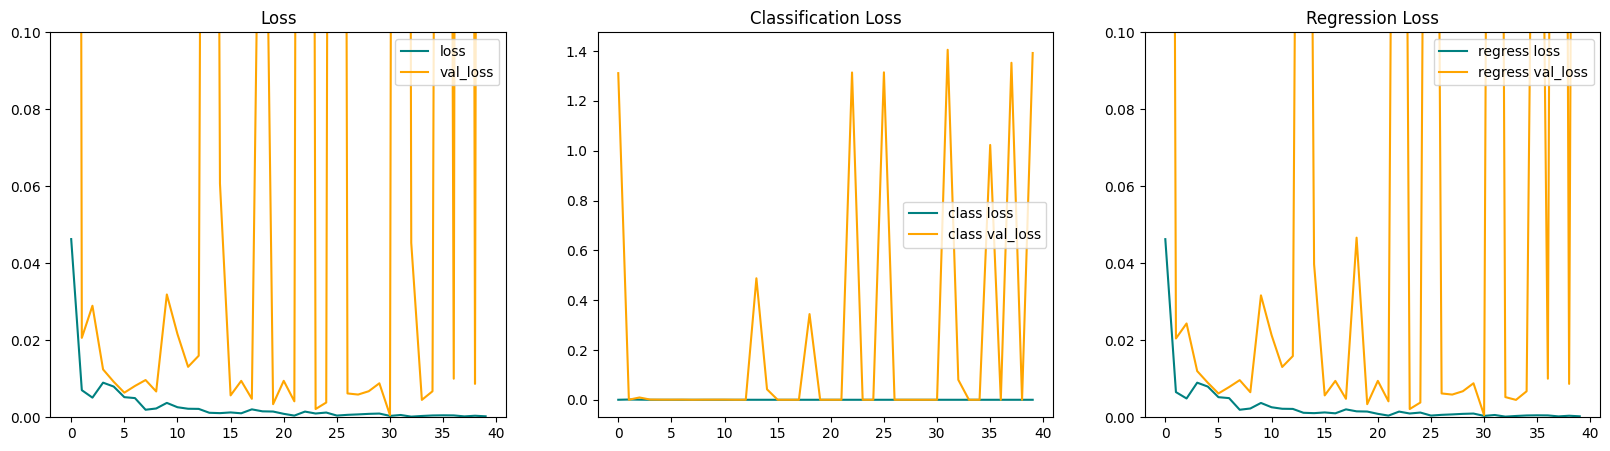

In [95]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

ax[0].set_ylim([0, 0.1])
ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val_loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[2].set_ylim([0, 0.1])
ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='class val_loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].set_ylim([0, 0.1])
ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='regress val_loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [116]:
test_data = test.as_numpy_iterator()

In [135]:
test_sample = test_data.next()

In [136]:
y_pred = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


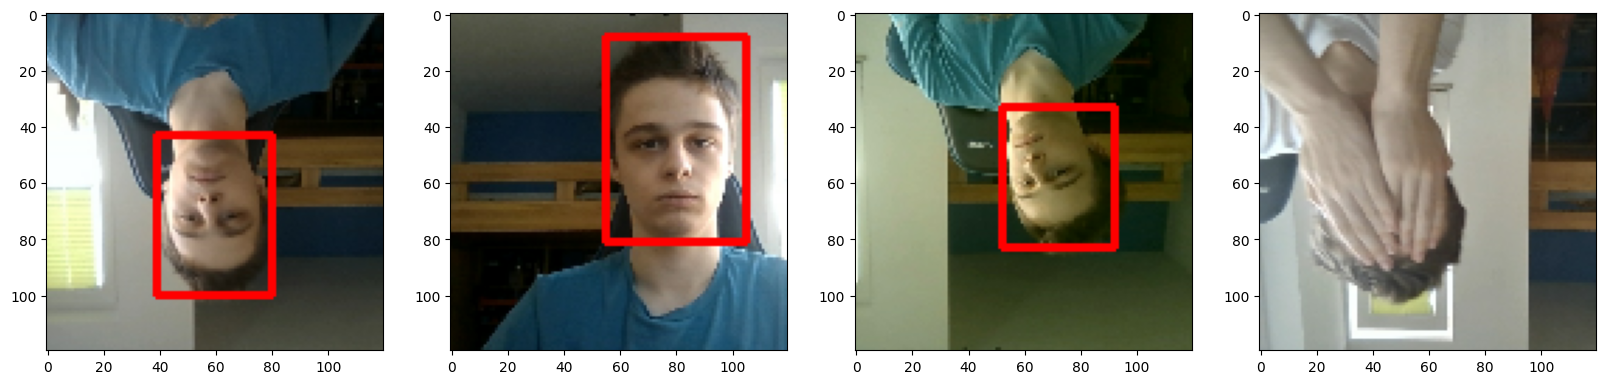

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = y_pred[1][idx]
    
    if y_pred[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                     tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                     tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                     (255, 0, 0),
                     2)
    ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [138]:
from tensorflow.keras.models import load_model

In [139]:
facetracker.save('facetracker1.h5')

## 11.3 Real Time Detection

In [145]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 19ms/step
